In [1]:
# SVM Kernels
# Gaussion kernel function also called Kernel Trick
# can do multiple functions and then add the result for better double centroid results

# rbf = gaussin = radous basis function // K(x,l)=e^((x-l)^2/2sigma^2)
# sigmoid 
# polynomial
# mlkernels.readthedocs.io/en/latest/kernelfunctions.html

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Importing the dataset
# must make UTS/Laptop varibales
ws_sub = r"Kernel SVM"
ws = r"Data"
data_file = "Social_Network_Ads.csv"
data_file_path = os.path.join(os.path.join(os.path.join(ws, ws_sub), "data"),data_file)
dataset = pd.read_csv(data_file_path)
# dataset

In [3]:
# splitting the dataset
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
# y

In [4]:
# splitting the dataset into the Training Set and the Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 1/4, random_state = 42)
## must check what random_state does
# X_train
# X_test
# Y_train
# Y_train

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(X_train)
x_test = sc_x.fit_transform(X_test)
# X test and train scaled with the same scale matrix

c:\users\c.r.c\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
# Fitting the classifier to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# predicting the test set results
y_pred = classifier.predict(x_test)
df = pd.DataFrame(y_pred)
df["test_vals"] = Y_test
df.rename(columns={0: "pred_vals"}, inplace = True)
df

,pred_vals,test_vals
0,1,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


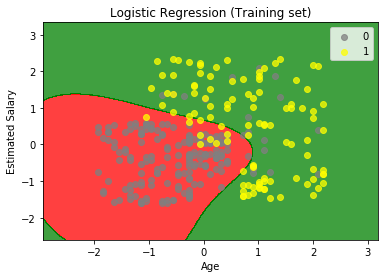

In [9]:
# Visualising the data
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, Y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() -1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
           alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], alpha = 0.75,
               c = ListedColormap(('gray', 'yellow'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

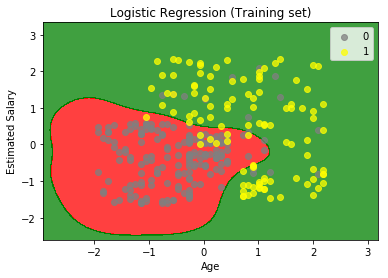

In [24]:
# Fitting the classifier to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 100, gamma = 20)
classifier.fit(x_train, Y_train)
# predicting the test set results
y_pred = classifier.predict(x_test)
df = pd.DataFrame(y_pred)
df["test_vals"] = Y_test
df.rename(columns={0: "pred_vals"}, inplace = True)
# df
# Visualising the data
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, Y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() -1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
           alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], alpha = 0.75,
               c = ListedColormap(('gray', 'yellow'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
# help(confusion_matrix)
cm = confusion_matrix(Y_test, y_pred)
cm
'''
SVC(kernel = 'rbf', random_state = 100, gamma = 2)
cm
array([[58,  5],
       [ 2, 35]], dtype=int64)
'''

"\nSVC(kernel = 'rbf', random_state = 100, gamma = 2)\ncm\narray([[58,  5],\n       [ 2, 35]], dtype=int64)\n"

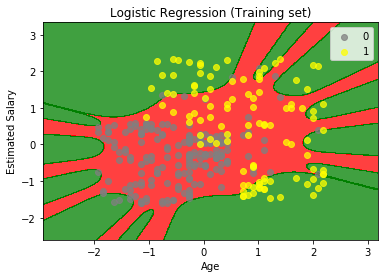

In [26]:
# Fitting the classifier to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 100, degree = 20)
classifier.fit(x_train, Y_train)
# predicting the test set results
y_pred = classifier.predict(x_test)
df = pd.DataFrame(y_pred)
df["test_vals"] = Y_test
df.rename(columns={0: "pred_vals"}, inplace = True)
# df
# Visualising the data
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, Y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() -1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
           alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], alpha = 0.75,
               c = ListedColormap(('gray', 'yellow'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()